In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 로이터 기사 데이터 셋을 로딩합니다.

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [12]:
train_data.shape

(8982,)

In [13]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [33]:
word_index = reuters.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())

decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [43]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [34]:
train_labels[0]

3

In [35]:
# 데이터의 준비
def vectorize_sequences(sequences, dimension=10000):

  results = np.zeros((len(sequences), dimension))

  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1

  return results

# 데이터의 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [36]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [37]:
# 라벨 데이터의 엔코딩
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))

  for i, sequence in enumerate(labels):
    results[i, sequence] = 1

  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [38]:
# cateogorical 데이터로 변환
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [45]:
# 신경망을 구성합니다. 

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu')) #64, 1000이랑 결과 비슷함. 최소한의 파라미터로 최적의 결과를 내야 좋음 
model.add(layers.Dense(46, activation='softmax'))

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                640064    
                                                                 
 dense_13 (Dense)            (None, 1000)              65000     
                                                                 
 dense_14 (Dense)            (None, 46)                46046     
                                                                 
Total params: 751,110
Trainable params: 751,110
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [48]:
# 훈련 데이터의 준비

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [49]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 2.2247 - accuracy: 0.5271 - val_loss: 1.4693 - val_accuracy: 0.6620
Epoch 2/20
16/16 [==============================] - 1s 64ms/step - loss: 1.2336 - accuracy: 0.7165 - val_loss: 1.1726 - val_accuracy: 0.7400
Epoch 3/20
16/16 [==============================] - 1s 65ms/step - loss: 0.9276 - accuracy: 0.7879 - val_loss: 1.0611 - val_accuracy: 0.7700
Epoch 4/20
16/16 [==============================] - 1s 64ms/step - loss: 0.6888 - accuracy: 0.8358 - val_loss: 0.9902 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 65ms/step - loss: 0.5193 - accuracy: 0.8756 - val_loss: 0.9170 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 63ms/step - loss: 0.3928 - accuracy: 0.9058 - val_loss: 1.0016 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 0.3081 - accuracy: 0.9247 - val_loss: 0.9257 - val_accuracy: 0.8130
Epoch 8/20
16

In [24]:
# 학습 결과를 가져온다.
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

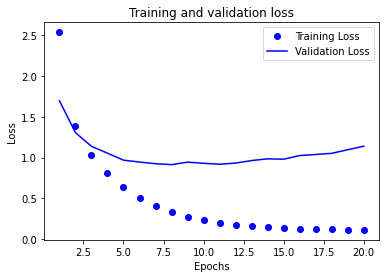

In [26]:
# 결과를 시각화한다.
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

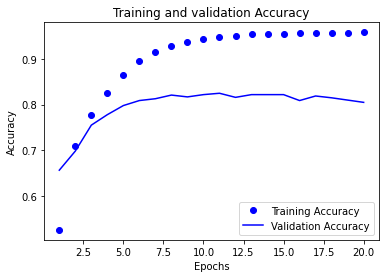

In [27]:
# 결과를 시각화한다.
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()